# P1 - Time Series Analysis

Due date: July 18, 2021, 11:59 pm

- The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: July 18, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)
- Projects will not be received after the delivery time or by any other means than the one established.

The project seeks to analyze a question of interest, which can be framed within a context, in order to interpret the results

1. Choosing your time series (Friday July 11th).

For the project, each group must select a dataset of their choice where the analysis can be performed using a time series model. There are many sources of time series data on the Internet. Government agencies are some of the best sources. But be resourceful. It is better to find a data set is from a process that interests you. Use a recent time-series, also try to avoid a tipical stock-price / exchange rates series. The selected time series must be sent no later than Sunday, July 11, 11:59 pm, through Sicua +, for approval.

The analysis of the data must consider:

2. Analysis of the context of the problem and relevance of the analysis: This should answer the question of why it is interesting or important to study the selected data.

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

5. Conclusions: The conclusions must be relevant to the problem of interest. Conclusions on the procedures performed are also expected.

In [1]:
import pandas as pd
import holidays_co
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../datasets/dataset_proyecto1.zip')

In [3]:
df.head()
df.columns

Index(['date', 'warehouse_id_ref', 'itemid', 'demand', 'pending_demand',
       'lastPrice', 'Price', 'stock', 'available_stock', 'city',
       'CAT_ACCESORIOS', 'CAT_EXPOPET', 'CAT_SNACKS', 'CAT_MEDICINAS',
       'CAT_CUIDADO_E_HIGIENE', 'CAT_JUGUETES', 'CAT_ALIMENTO_PRESCRIPCION',
       'CAT_HIGIENE', 'CAT_REGALOS', 'CAT_PARA_PETLOVERS', 'CAT_FARMAPET',
       'CAT_PREMIOS', 'CAT_VETERINARIOS', 'CAT_ALIMENTO', 'CAT_COMBOS',
       'CAT_ARENAS'],
      dtype='object')

In [4]:
df['ALIMENTOS'] = (df.CAT_SNACKS + df.CAT_ALIMENTO_PRESCRIPCION + df.CAT_ALIMENTO) >= 1
df['ALIMENTOS'] = df.ALIMENTOS.astype('int')
df.head()

,date,warehouse_id_ref,itemid,demand,pending_demand,lastPrice,Price,stock,available_stock,city,...,CAT_HIGIENE,CAT_REGALOS,CAT_PARA_PETLOVERS,CAT_FARMAPET,CAT_PREMIOS,CAT_VETERINARIOS,CAT_ALIMENTO,CAT_COMBOS,CAT_ARENAS,ALIMENTOS
0,2020-08-17T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
1,2020-08-18T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
2,2020-08-19T00:00:00.000Z,1,9953,2,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
3,2020-08-20T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
4,2020-08-21T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df = df[['date', 'warehouse_id_ref', 'itemid', 'demand', 'pending_demand', 
         'lastPrice', 'Price', 'stock', 'available_stock', 'city', 'ALIMENTOS']]

In [6]:
df_alimentos = df[(df.ALIMENTOS == 1) & (df.city == "Bogota")]
df_no_alimentos = df[(df.ALIMENTOS == 0) & (df.city == "Bogota")]
print( df.shape ) 
print( df_alimentos.shape ) 
print( df_no_alimentos.shape ) 

(2286885, 11)
(601346, 11)
(493996, 11)


In [7]:
df_alimentos = df_alimentos[df_alimentos['date'] >= '2020-09-01']
df_no_alimentos = df_no_alimentos[df_no_alimentos['date'] >= '2020-09-01']

In [8]:
df_alimentos.head()

,date,warehouse_id_ref,itemid,demand,pending_demand,lastPrice,Price,stock,available_stock,city,ALIMENTOS
345,2020-09-01T00:00:00.000Z,1,10642,4,0,3299.0,3299.0,154.0,1.0,Bogota,1
346,2020-09-02T00:00:00.000Z,1,10642,15,0,3299.0,3299.0,154.0,1.0,Bogota,1
347,2020-09-03T00:00:00.000Z,1,10642,7,0,3299.0,3299.0,154.0,1.0,Bogota,1
348,2020-09-04T00:00:00.000Z,1,10642,2,0,3299.0,3299.0,154.0,1.0,Bogota,1
349,2020-09-05T00:00:00.000Z,1,10642,8,0,3299.0,3299.0,226.0,1.0,Bogota,1


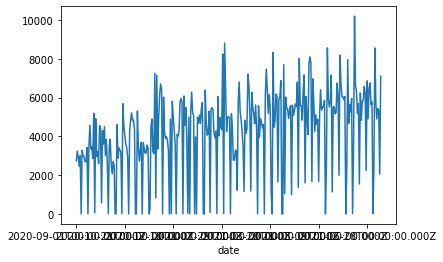

In [9]:
df_alimentos.groupby('date')['demand'].sum().plot()

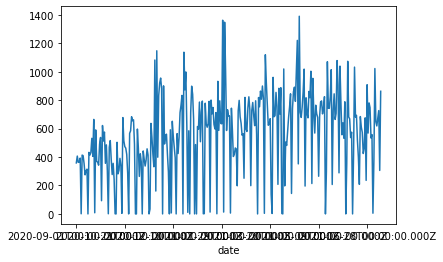

In [10]:
df_no_alimentos.groupby('date')['demand'].sum().plot()

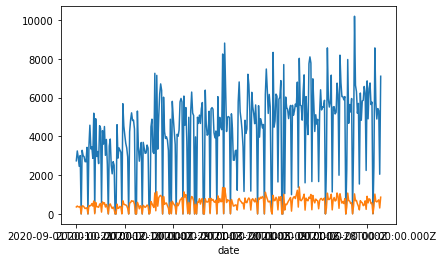

In [11]:
df_alimentos.groupby('date')['demand'].sum().plot()
df_no_alimentos.groupby('date')['demand'].sum().plot()

In [12]:
df_alimentos.date = pd.to_datetime(df_alimentos.date)
df_alimentos = df_alimentos.dropna()

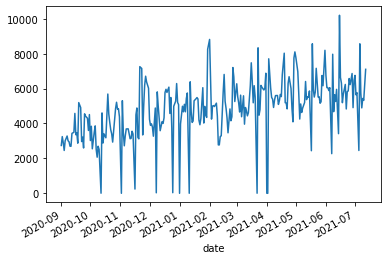

In [13]:
df_alimentos_sin_fds = df_alimentos[ ~df_alimentos.date.dt.weekday.isin([6]) ]
df_alimentos_sin_fds.groupby('date')['demand'].sum().plot()

In [14]:
df_alimentos_sin_fds.date.dt.weekday.value_counts()

0    82314
5    82244
4    82201
3    82146
2    82017
1    81957
Name: date, dtype: int64

In [15]:
pd.date_range(start = df_alimentos.date.min(), 
              end = df_alimentos.date.max() ).difference(df_alimentos.date)

DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)

In [16]:
festivos = [ x[0] for x in (holidays_co.get_colombia_holidays_by_year(2020) + holidays_co.get_colombia_holidays_by_year(2021)) ]

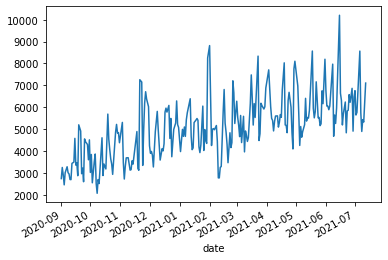

In [17]:
df_alimentos_sin_fds_ni_festivos = df_alimentos_sin_fds[ ~df_alimentos_sin_fds.date.isin( festivos ) ]
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().plot()

In [18]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [19]:
adf_test(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum())

Results of Dickey-Fuller Test:
Test Statistic                  -3.558286
p-value                          0.006610
#Lags Used                       4.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


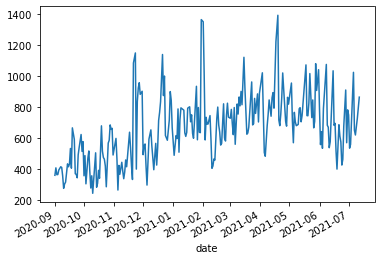

In [20]:
df_no_alimentos.date = pd.to_datetime(df_no_alimentos.date)
df_no_alimentos_sin_fds = df_no_alimentos[ ~df_no_alimentos.date.dt.weekday.isin([6]) ]
df_no_alimentos_sin_fds_ni_festivos = df_no_alimentos_sin_fds[ ~df_no_alimentos_sin_fds.date.isin( festivos ) ]
df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().plot()

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

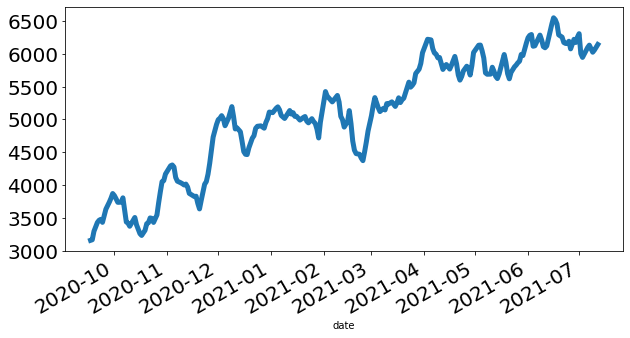

In [21]:
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().rolling(15).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)

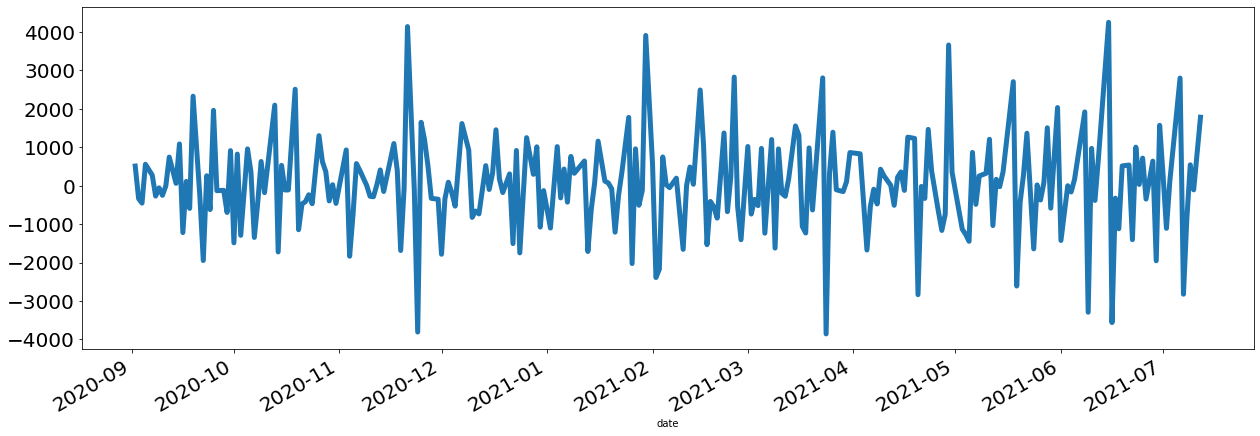

In [22]:
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().diff().plot(figsize=(21,7), linewidth=5, fontsize=20)

In [23]:
adf_test(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().diff()[1:])

Results of Dickey-Fuller Test:
Test Statistic                -6.930384e+00
p-value                        1.087945e-09
#Lags Used                     1.500000e+01
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


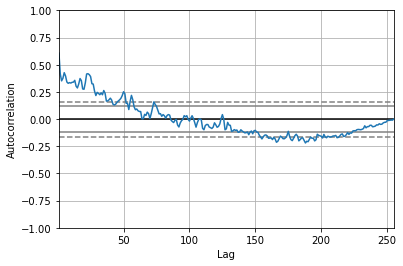

In [24]:
pd.plotting.autocorrelation_plot(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum())

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

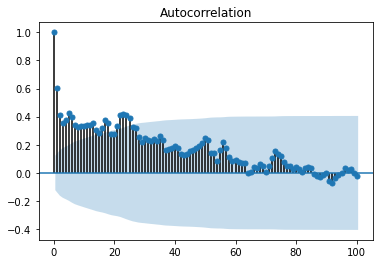

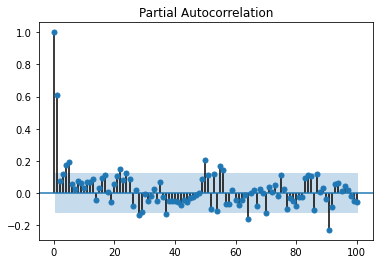

In [26]:
plot_acf( df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum(), lags=100);
plot_pacf( df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum(), lags=100);

In [27]:
from statsmodels.tsa.arima_model import ARIMA

series = df_alimentos_sin_fds_ni_festivos.groupby('date')[['demand']].sum()

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:               D.demand   No. Observations:                  254
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2131.121
Method:                       css-mle   S.D. of innovations           1064.070
Date:                Sun, 18 Jul 2021   AIC                           4276.242
Time:                        21:34:05   BIC                           4301.003
Sample:                             1   HQIC                          4286.203
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.9251     24.354      0.531      0.596     -34.809      60.659
ar.L1.D.demand    -0.4748      0.062     -7.614      0.000      -0.597      -0.353
ar.L2.D.demand    -0.4575      0.067

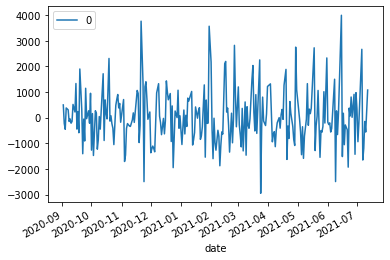

In [28]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [29]:
series.index = pd.to_datetime(series.index.date)
X = series
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

model = ARIMA(train, order=(3,0,2))
model_fit = model.fit(disp=0)

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


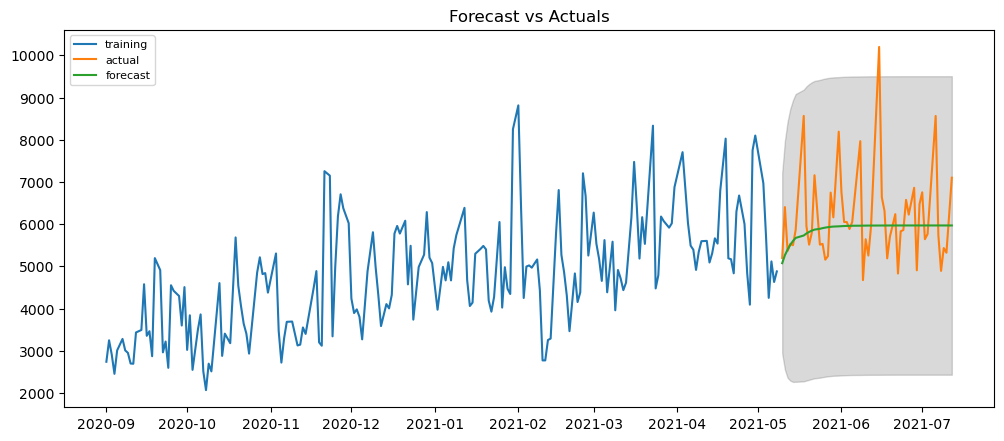

In [30]:
# Forecast
fc, se, conf = model_fit.forecast(51)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
mean_absolute_error(test, fc)

706.1352091931429

In [33]:
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#Iterando
results = []
for p in range(1,9):        
    for d in range(0,4):                
        for q in range(1,6):
            
            try:                
                # Create and fit ARMA(p,q) model
                X = series
                size = int(len(X) * 0.8)
                train, test = X[0:size], X[size:len(X)]

                model = ARIMA(train, order=(p,d,q))
                model_fit = model.fit(disp=0)
                output= model_fit.forecast(steps=len(test))[0]
                yhat = output
                predictions = yhat
                real_values = test
                error = mean_absolute_error(test, predictions)

                # Print p, q, AIC, BIC
                #print(p, d, q, 'Test MSE: %.3f' % error) 
                results.append([p,d,q,error])
                
            except Exception as e:
                #print(p, d, q, None )
                results.append([p,d,q,None])
                
df = pd.DataFrame(results,columns=['p','d','q','mae'])

In [34]:
df.loc[df['mae'] == df['mae'].min()]

,p,d,q,mae
41,3,0,2,706.135209


In [35]:
from pmdarima.arima import auto_arima

In [36]:
model = auto_arima(train, X=None, start_p=1, d=None, start_q=1, max_p=9, max_d=1, max_q=9)
model_fit = model.fit(train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1688.876
Date:                Sun, 18 Jul 2021   AIC                           3385.751
Time:                        21:36:19   BIC                           3399.004
Sample:                             0   HQIC                          3391.113
                                - 204                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4727      0.074      6.400      0.000       0.328       0.617
ar.L2         -0.1554      0.077     -2.016      0.044      -0.307      -0.004
ma.L1         -0.9283      0.040    -23.446      0.000      -1.006      -0.851
sigma2      9.753e+05   7.72e+04     12.635      0.000    8.24e+05    1.13e+06
===================================================================================
Ljung-Box (Q):                       32.73   Jarque-Bera (JB):                25.59
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                             0.64
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

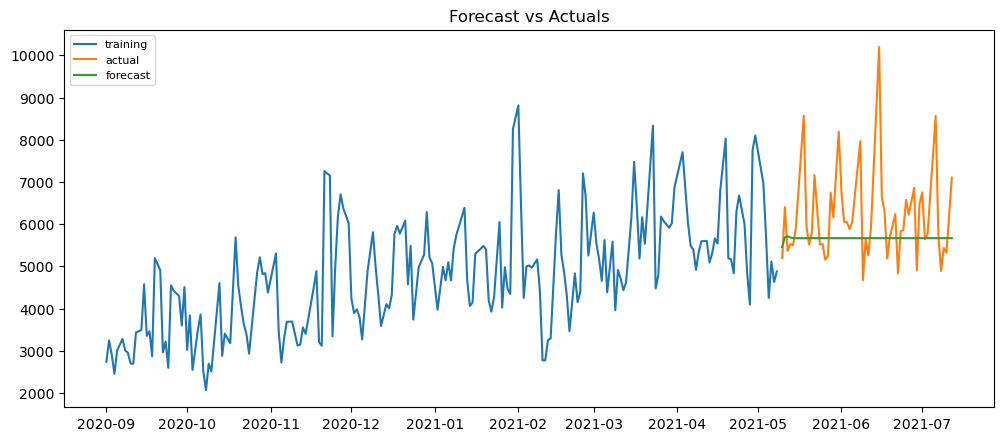

In [37]:
# Forecast
fc = model_fit.predict(51)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [38]:
mean_absolute_error(test, fc)

748.9924885754529

In [39]:
from prophet.plot import add_changepoints_to_plot
from prophet import Prophet
import pandas as pd
import numpy as np
%matplotlib inline

In [40]:
series = df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum()
df_prophet = pd.DataFrame( series ).reset_index().rename(columns={'date':'ds','demand':'y'})
df_prophet.ds = df_prophet.ds.dt.date

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


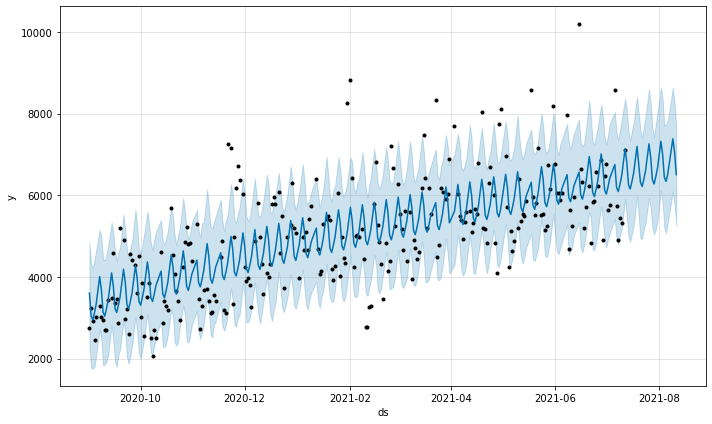

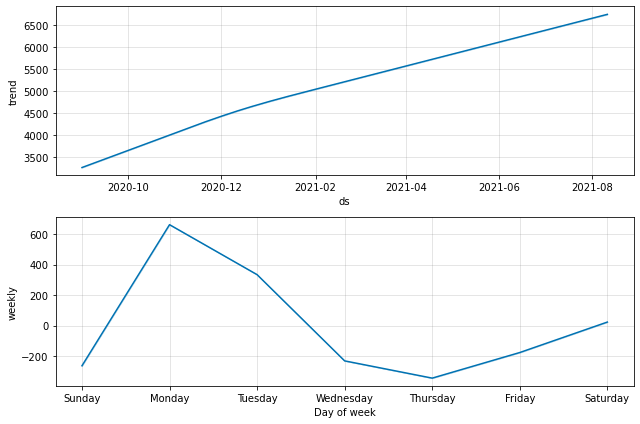

In [41]:
m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30, freq='D')
future = future[ ~future.ds.dt.weekday.isin([6]) ]
future = future[ ~future.ds.isin( festivos ) ]

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


fig1 = m.plot(forecast)
m.plot_components(forecast);

In [42]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
df_cv = cross_validation(m, initial='60 days', period='15 days', horizon = '50 days')

INFO:prophet:Making 14 forecasts with cutoffs between 2020-11-09 00:00:00 and 2021-05-23 00:00:00


In [43]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days,1.395302e+06,1181.229053,974.172500,0.213390,0.163283,0.194099,0.655844
1,6 days,1.469142e+06,1212.081835,972.522879,0.214632,0.166616,0.193496,0.696429
2,7 days,1.570791e+06,1253.311992,996.154407,0.208221,0.156622,0.191205,0.694805
3,8 days,1.274324e+06,1128.859748,883.336892,0.177163,0.134223,0.165656,0.732143
4,9 days,1.242180e+06,1114.531290,842.767170,0.160350,0.131754,0.153830,0.738095
5,10 days,1.193256e+06,1092.362421,804.481821,0.140727,0.121700,0.141177,0.758929
6,11 days,1.077737e+06,1038.141261,765.502912,0.132373,0.121700,0.134460,0.726190
7,12 days,9.980049e+05,999.001950,732.251273,0.131985,0.117619,0.131932,0.761364
8,13 days,1.004261e+06,1002.128431,734.525101,0.140774,0.112301,0.135612,0.791071
9,14 days,1.083881e+06,1041.095844,779.303510,0.150235,0.109133,0.144032,0.791667


In [44]:
df_p["mae"].mean()

905.7052220270808

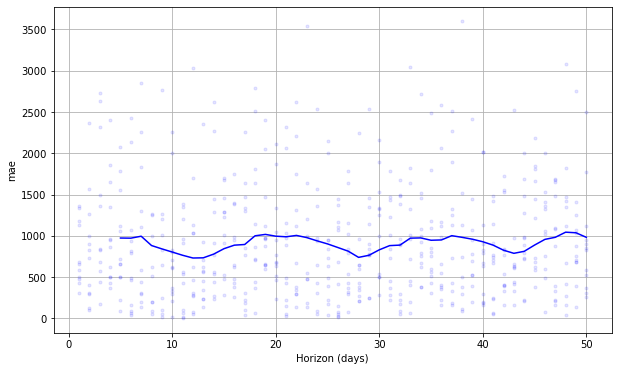

In [45]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [46]:
festivos_col = [ (x[0],x[1]) for x in (holidays_co.get_colombia_holidays_by_year(2020) + holidays_co.get_colombia_holidays_by_year(2021)) ]
df_festivos_col = pd.DataFrame( festivos_col, columns=['ds','holiday'])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


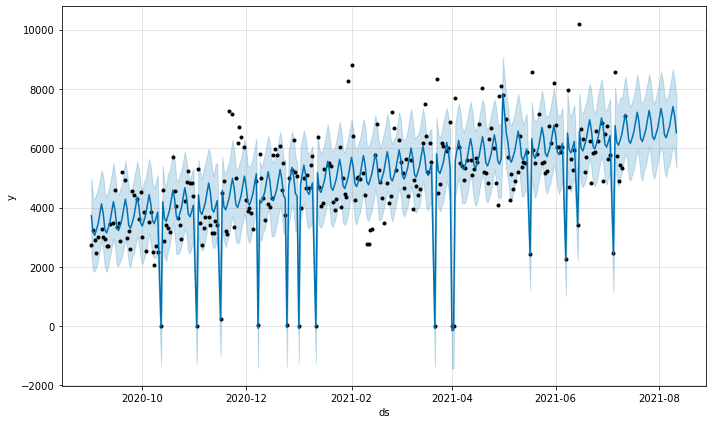

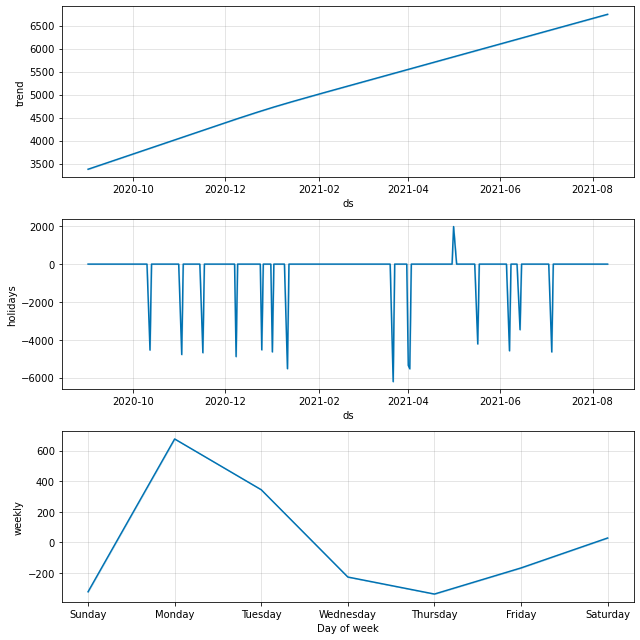

In [47]:
series = df_alimentos_sin_fds.groupby('date')['demand'].sum()

df_prophet = pd.DataFrame( series ).reset_index().rename(columns={'date':'ds','demand':'y'})
df_prophet.ds = df_prophet.ds.dt.date

m = Prophet(holidays = df_festivos_col)
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30, freq='D')
future = future[~future.ds.dt.weekday.isin([6])]

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


fig1 = m.plot(forecast)
m.plot_components(forecast);

In [48]:
df_cv = cross_validation(m, initial='60 days', period='15 days', horizon = '50 days')

INFO:prophet:Making 14 forecasts with cutoffs between 2020-11-09 00:00:00 and 2021-05-23 00:00:00


In [49]:
df_p = performance_metrics(df_cv)
df_p

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,5 days,2.301092e+06,1516.935069,1109.654717,0.161758,0.251369,0.633333
1,6 days,2.008391e+06,1417.177153,1043.974058,0.161758,0.221294,0.683333
2,7 days,2.473950e+06,1572.879418,1145.589506,0.161758,0.250300,0.666667
3,8 days,2.483064e+06,1575.774008,1103.337457,0.145756,0.255776,0.683333
4,9 days,3.239497e+06,1799.860295,1199.397374,0.135758,0.287697,0.666667
5,10 days,3.204268e+06,1790.046897,1168.670028,0.131754,0.276656,0.683333
6,11 days,3.098315e+06,1760.203164,1138.072170,0.126915,0.271693,0.650000
7,12 days,2.691211e+06,1640.490981,1040.757299,0.120122,0.241565,0.700000
8,13 days,2.433107e+06,1559.842102,974.454302,0.115758,0.212589,0.750000
9,14 days,2.081409e+06,1442.708805,944.040823,0.115758,0.206595,0.750000


In [50]:
df_p["mae"].mean()

1141.0234595809823

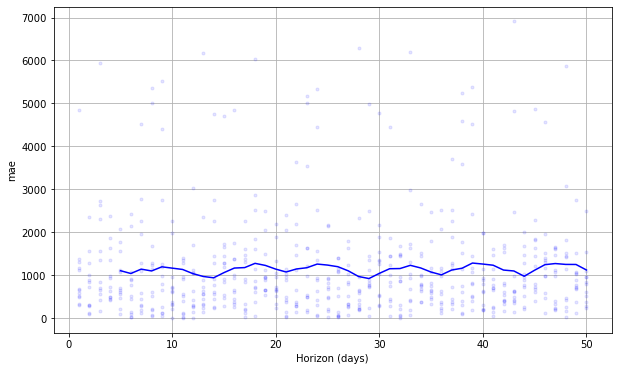

In [51]:
fig = plot_cross_validation_metric(df_cv, metric='mae')